In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#%cd gdrive/My Drive/week4/

In [3]:
! git clone https://github.com/SibitendaHarriet/ALFFA_PUBLIC.git

Cloning into 'ALFFA_PUBLIC'...
remote: Enumerating objects: 66024, done.
remote: Total 66024 (delta 0), reused 0 (delta 0), pack-reused 66024
Receiving objects: 100% (66024/66024), 6.54 GiB | 16.34 MiB/s, done.
Resolving deltas: 100% (12337/12337), done.
Checking out files: 100% (56925/56925), done.


In [4]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


In [5]:
import os
os.chdir("/content/ALFFA_PUBLIC/ASR/SWAHILI/data/")
os.listdir()

['train', 'test']

In [6]:

import os
import librosa   #for audio processing

In [8]:
!pip install torchaudio

     |████████████████████████████████| 1.9 MB 9.0 MB/s 


In [9]:

import math, random
import torch
import torchaudio
import numpy as np
import pandas as pd
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [11]:
%cd gdrive/MyDrive/

[Errno 2] No such file or directory: 'gdrive/MyDrive/'
/content


In [15]:
import os
import librosa   #for audio processing

In [19]:
import os
os.chdir("/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav")
folders = os.listdir()
folders[:5]

['SWH-15-20110224',
 'SWH-05-20101107',
 'SWH-15-20101115',
 'SWH-15-20110207',
 'SWH-05-20110125']

In [20]:

len(folders)

30

In [21]:

def meta_data(path):
  df=pd.read_csv(path,sep="\t",header=None)
  df.columns=['filename', 'transcription']
  # df = df.head(50)
  filepaths=[]
  sample_rates=[]
  duration=[]
  for f in df['filename']:
    parent_folder=f.split('_')[0]
    filepath = f'{parent_folder}/{f}.wav'
    audio, fs = librosa.load(filepath, sr=None)
    filepaths.append(filepath)
    sample_rates.append(fs)
    duration.append(float(len(audio)/fs))
  df['filepath'] = filepaths
  df['sample_rate'] = sample_rates
  df['duration'] = duration
  return df

In [23]:
meta_df = meta_data('/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/text')

In [24]:
meta_df

,filename,transcription,filepath,sample_rate,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,rais wa tanzania jakaya mrisho kikwete,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.140000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.100000
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.650000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.900000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.940000
...,...,...,...,...,...
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.500062
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.910000
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.950000
10178,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.590000


In [25]:
os.chdir("/content/drive/MyDrive/")

In [26]:

meta_df.to_csv('metadata.csv', index=False)

In [27]:
meta_df = pd.read_csv('metadata.csv')
meta_df.head(10)

,filename,transcription,filepath,sample_rate,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,rais wa tanzania jakaya mrisho kikwete,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.14
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.10
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.65
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.90
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.94
5,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.45
6,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,walipata fursa ya kutumia haki yao ya msingi,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.62
7,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,waziri mkuu wa zamani alasane watara,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.48
8,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,na rais aliyetangulia henry konan berdi,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.53
9,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,walichuana vikali na rais lauren bagbo,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.74


In [33]:
meta_df.value_counts()

filename                                                                transcription                                                                          filepath                                                                                    sample_rate  duration
SWH-15-20110310_16k-emission_swahili_15h00_-_16h00_tu_20110310_part99   na kesi yake ya kubadilishana almasi na silaha na kuchangia mauwaji huko sierra leone  SWH-15-20110310/SWH-15-20110310_16k-emission_swahili_15h00_-_16h00_tu_20110310_part99.wav   16000        5.010000    1
SWH-05-20110321_16k-emission_swahili_05h30_-_06h00_tu_20110321_part25   wa pili umekuwa kabisa uchaguzi ambao umefanyika katika kimia usipokuwa                SWH-05-20110321/SWH-05-20110321_16k-emission_swahili_05h30_-_06h00_tu_20110321_part25.wav   16000        3.780000    1
SWH-05-20110321_16k-emission_swahili_05h30_-_06h00_tu_20110321_part31   akizungumza na mwenzangu victor robert willi kumweleza mambo ilivyokuwa hapo jana      SWH-05-20110

In [ ]:
meta_data.channels.value_counts()

Loading Sample Audio File

In [35]:

train_audio_path = '/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106'
sample, sample_rates = librosa.load('/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav')
print(sample)
print(sample_rates)

[0.02953335 0.03225018 0.02603412 ... 0.09593043 0.09478676 0.05775513]
22050


In [37]:

audio, rate=librosa.load('/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav')

In [38]:
ipd.Audio(sample, rate=sample_rates)

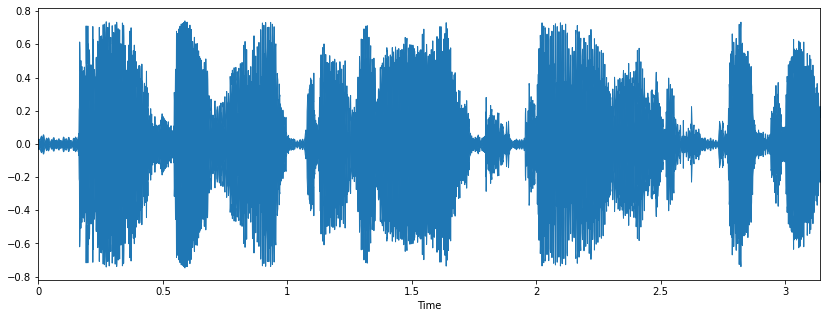

In [40]:
# plotting the wave plot 
plt.figure(figsize=(14,5))
sample, sample_rates = librosa.load('/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav')
librosa.display.waveplot(sample, sr=sample_rates)

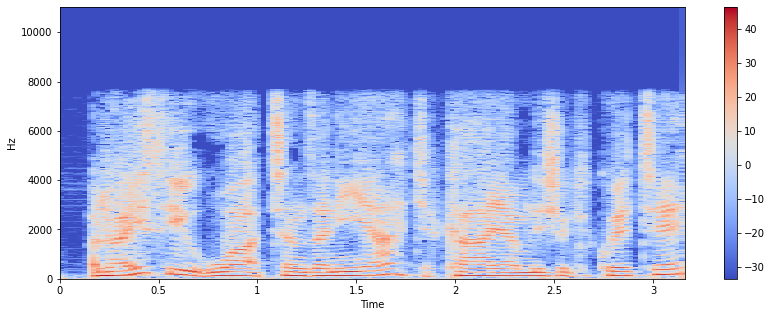

In [41]:
#display Spectrogram
X = librosa.stft(sample)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rates, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 136)


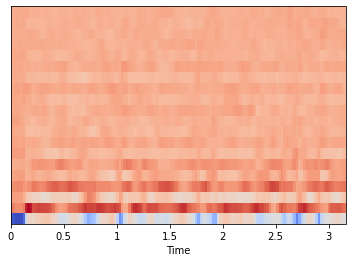

In [42]:
mfccs = librosa.feature.mfcc(sample, sr=16000)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rates, x_axis='time')

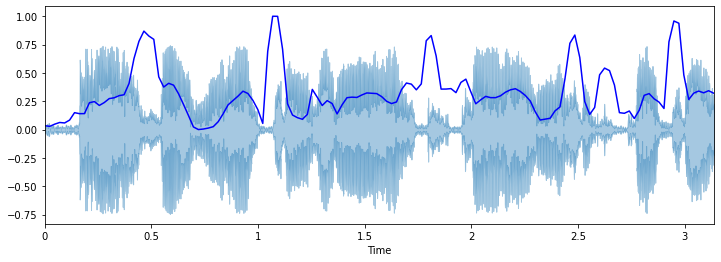

In [43]:
#Plots Spectral Centroid 

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(sample, sr=sample_rates)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sample, sr=sample_rates, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


# Spectral centroid is used to locate where the 'center of mass' of a sound is located

In [46]:

train_audio_path = "/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/"
samples, sample_rate = librosa.load("/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100.wav")
print(samples)
print(sample_rate)

[ 0.00471402  0.00630584  0.00576152 ...  0.01627303 -0.00729037
 -0.01463527]
22050


In [47]:

ipd.Audio(samples, rate=sample_rate)

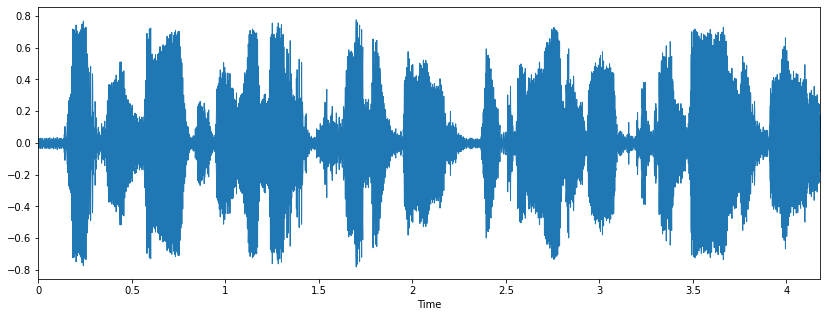

In [48]:

# plotting the wave plot 
plt.figure(figsize=(14,5))
samples, sample_rate = librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part3.wav')
librosa.display.waveplot(samples, sr=sample_rate)

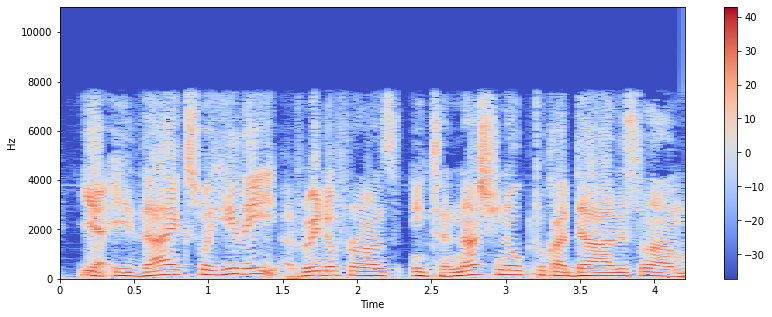

In [49]:
#display Spectrogram
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 181)


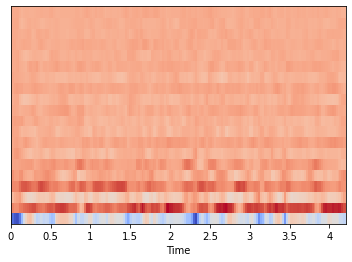

In [50]:
mfccs = librosa.feature.mfcc(samples, sr=16000)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

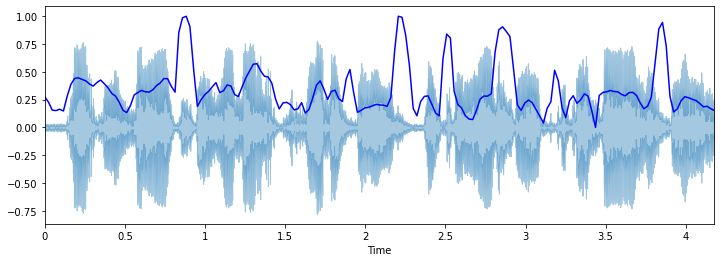

In [51]:
#Plots Spectral Centroid 

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(samples, sr=sample_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


# Spectral centroid is used to locate where the 'center of mass' of a sound is located

Loading Transcription

In [63]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  def open(self, audio_file):
    sig,sr = torchaudio.load(audio_file)
    return (sig,sr)
   # converting into channels
  def rechannel(self, aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
      aud = resig ,sr 
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])
      aud = resig ,sr 
      
    return aud
  # Resample audio data set
  def resample(self,aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])
      aud = resig, newsr
    return (aud) 
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  def pad_trunc(self, aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      aud = sig,sr
      
    return (aud)
  # Shifts the signal to the left or right by some percent. Values at the end
  # are 'wrapped around' to the start of the transformed signal.
  def time_shift(self, aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    aud = sig.roll(shift_amt), sr
    return (aud)

In [64]:
# loading an audio file
audioutil = AudioUtil()
filename='/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav'

In [67]:
Audio = audioutil.open(filename)

In [66]:
sig, sr = aud

In [72]:
lines = []
with open('/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/text') as f:
    lines = f.readlines()

In [73]:
lines[0:5]


['SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10\trais wa tanzania jakaya mrisho kikwete\n',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100\tyanayo andaliwa nami pendo pondo idhaa ya kiswahili\n',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101\tinayokutangazia moja kwa moja kutoka jijini dar es salaam tanzania\n',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102\tjuma hili bara la afrika limeshuhudia raia wa nchi za niger\n',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103\twakipiga kura ya maoni ilikufanya mabadiliko ya\n']

In [74]:
audioutil = AudioUtil()

In [81]:
from tqdm import tqdm

In [85]:
os.chdir("/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train")
os.listdir()

['wav.scp', 'spk2utt', 'utt2spk', 'wav', 'text']

In [86]:
DATASET_PATH = "/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav"
SAMPLE_RATE = 22050
labels=[]
def preprocess(dataset_path):
    # dictionary to store files
    
    # loop through all sub-folders
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping eg SWH-05-20101106
            label = dirpath.split("/")[-1]
           
            print("\nProcessing: {}".format(label))

            # process all audio files in genre sub-dir
            for f in filenames:

		        # load audio file
                filename="/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/"+label+"/"+f
                labels.append(filename)
                 
if __name__ == "__main__":
    preprocess(DATASET_PATH)


Processing: SWH-15-20110224

Processing: SWH-05-20101107

Processing: SWH-15-20101115

Processing: SWH-15-20110207

Processing: SWH-05-20110125

Processing: SWH-15-20101227

Processing: SWH-05-20110123

Processing: SWH-05-20110321

Processing: SWH-05-20110317

Processing: SWH-15-20110126

Processing: SWH-15-20101130

Processing: SWH-15-20101113

Processing: SWH-15-20110124

Processing: SWH-05-20101121

Processing: SWH-05-20101123

Processing: SWH-15-20101104

Processing: SWH-15-20110303

Processing: SWH-05-20110114

Processing: SWH-05-20101109

Processing: SWH-05-20101111

Processing: SWH-15-20101117

Processing: SWH-05-20101112

Processing: SWH-15-20101109

Processing: SWH-05-20110327

Processing: SWH-05-20101113

Processing: SWH-15-20110310

Processing: SWH-05-20101110

Processing: SWH-05-20101106

Processing: SWH-05-20110215

Processing: SWH-15-20101103


In [87]:
len(labels)

10180

In [88]:
df=pd.read_csv("/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/text",sep="\t",header=None)
df = df.drop([0],axis=1)
df.columns=['text']
df.head()

,text
0,rais wa tanzania jakaya mrisho kikwete
1,yanayo andaliwa nami pendo pondo idhaa ya kisw...
2,inayokutangazia moja kwa moja kutoka jijini da...
3,juma hili bara la afrika limeshuhudia raia wa ...
4,wakipiga kura ya maoni ilikufanya mabadiliko ya


In [89]:
df.shape[0]

10180

In [95]:
df['audio']=labels
df.head()

,text,audio
0,rais wa tanzania jakaya mrisho kikwete,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
1,yanayo andaliwa nami pendo pondo idhaa ya kisw...,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
2,inayokutangazia moja kwa moja kutoka jijini da...,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
3,juma hili bara la afrika limeshuhudia raia wa ...,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
4,wakipiga kura ya maoni ilikufanya mabadiliko ya,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...


In [96]:
def clean_column(data:pd.DataFrame,col:str):
  words_list=[' UNK ', ' music ', ' laughter ']
  data = data[~data[col].isin(words_list)]
  for row in data[col]:
    for punctuation in string.punctuation:
        row = row.replace(punctuation," ")
  return data

In [97]:
import string 
clean_column(df,'text')

,text,audio
0,rais wa tanzania jakaya mrisho kikwete,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
1,yanayo andaliwa nami pendo pondo idhaa ya kisw...,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
2,inayokutangazia moja kwa moja kutoka jijini da...,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
3,juma hili bara la afrika limeshuhudia raia wa ...,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
4,wakipiga kura ya maoni ilikufanya mabadiliko ya,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
...,...,...
10175,na somo lile lililopokelewa kule kenya,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
10176,ambapo mtu aliyeshindwa kwenye uchaguzi,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
10177,ni kauli yake mchambuzi wa masuala ya siasa,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...
10178,mwanasheria anayemtetea rais wa zamani wa liberia,/content/ALFFA_PUBLIC/ASR/SWAHILI/data/train/w...


Expolaratory Data Analysis

In [99]:
def audio_test(data:pd.DataFrame,col:str,row:int):
  file=data[col].loc[row]
  plt.figure(figsize=(12,6))
  signal,sample_rate=librosa.load(file)
  librosa.display.waveplot(signal,sr=sample_rate)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.show()
  return ipd.Audio(file)

def plot_eda(data:pd.DataFrame,col:str,row:int):
  file=data[col].loc[row]
  signal,sample_rate=librosa.load(file)

  #fft inputs
  fft = np.fft.fft(signal)
  magnitude=np.abs(abs(fft))
  frequency = np.linspace(0,sample_rate,len(magnitude))
  left_magnitude=magnitude[:int(len(magnitude)/2)]
  left_frequency=frequency[:int(len(frequency)/2)]

  #spectrogram inputs
  n_fft = 2048 #amount of samples
  hop_length= 512 #how much we're sliding towards the right

  plt.figure(figsize=(12,8))

  plt.subplot(2,2,1)
  plt.plot(frequency,magnitude)
  plt.xlabel('frequency')
  plt.ylabel('magnitude')
  plt.title('FFT plot of frequency against magnitude')

  plt.subplot(2,2,2)
  plt.plot(left_frequency,left_magnitude)
  plt.xlabel('frequency')
  plt.ylabel('magnitude')
  plt.title('FFT plot of frequency against magnitude')

  plt.subplot(2,2,3)
  stft=librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)
  spectrogram = np.abs(stft)
  log_spectrogram=librosa.amplitude_to_db(spectrogram)
  librosa.display.specshow(log_spectrogram,sr=sample_rate,hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.title('Spectrogram plot of frequency against time')
  plt.colorbar()

  plt.subplot(2,2,4)
  MFCCs=librosa.feature.mfcc(signal,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)
  librosa.display.specshow(MFCCs,sr=sample_rate,hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("MFCC")
  plt.title('MFCC plot of frequency against time')
  plt.colorbar()

  plt.show()

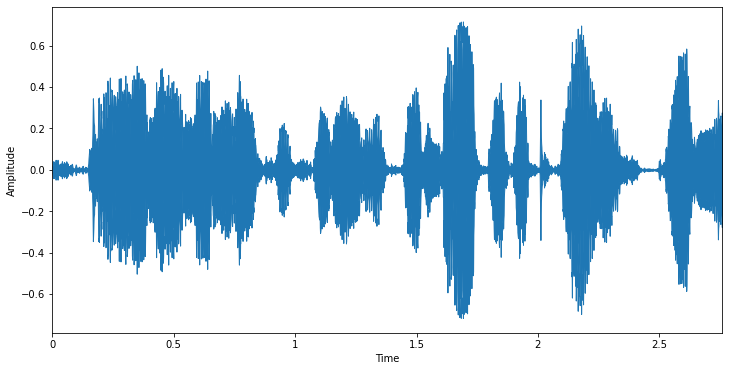

In [98]:
audio_test(df,'audio',9908)

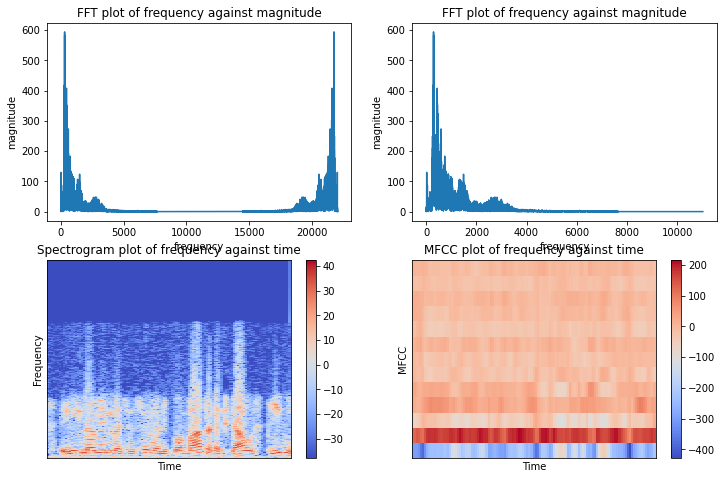

In [100]:
plot_eda(df,'audio',9908)

Convert into channels

Some of the sound files are mono (ie. 1 audio channel) while most of them are stereo (ie. 2 audio channels). Since the Neural network model expects all items to have the same dimensions, we will convert the mono files to stereo, by duplicating the first channel to the second Check whether sound files are mono or stereo

In [102]:
chan=[]
for i in df['audio']:
  sig, sr = torchaudio.load(i)
  sig_shape=sig.shape[0]
  chan.append(sig_shape)

In [103]:

#getting unique values from list
set_channel=set(chan)
print('Unique sound signals',set_channel)

Unique sound signals {1}


Audio files are all mono

In [104]:
def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

Spectrogram

In [105]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [106]:
spe_samples,frequency=spectrogram(samples)

In [107]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [108]:
spe_samples

array([[1.36373824e-02, 1.68458917e-02, 3.84563660e-02, ...,
        1.05248268e-01, 4.88198083e-03, 1.22208309e-01],
       [2.07464198e-02, 2.56179762e-02, 3.76750487e-02, ...,
        7.91384135e-01, 3.63697518e-01, 7.31460708e-01],
       [1.80384582e-03, 1.09525856e-03, 2.69785761e-03, ...,
        1.14885237e+00, 4.42945456e-02, 6.15300287e-01],
       ...,
       [1.66475885e-15, 6.77365860e-17, 3.61396857e-16, ...,
        2.86604760e-15, 8.97511059e-16, 1.23193303e-15],
       [1.84672300e-15, 6.86886482e-18, 8.46600266e-18, ...,
        1.01819342e-14, 1.34004315e-15, 8.61738274e-15],
       [9.11512277e-16, 3.54341144e-17, 7.12756161e-17, ...,
        7.20771123e-16, 2.83362722e-16, 1.69225109e-15]])

In [109]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

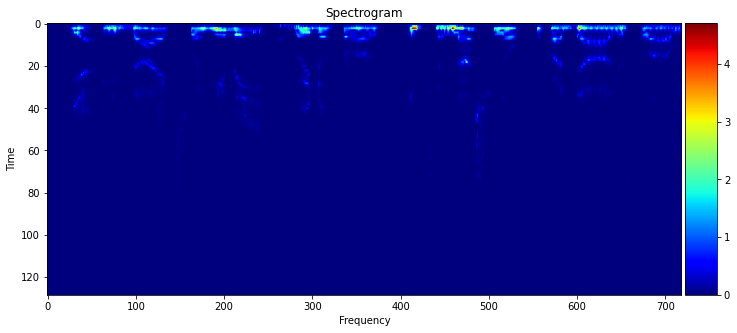

In [110]:
plot_spectrogram_feature(spe_samples)

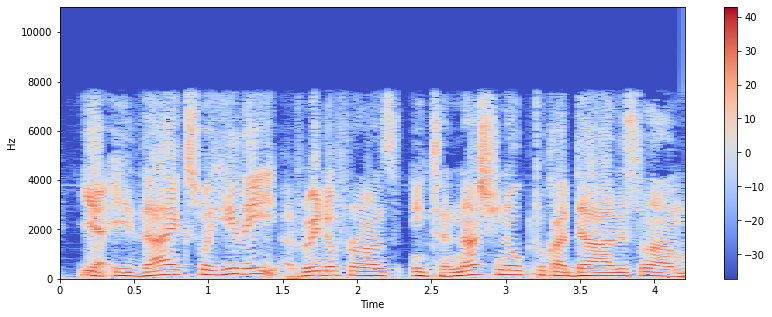

In [111]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()